In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv('cleaned_shark.csv')

In [11]:
df.head()

,Unnamed: 0,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,...,shark_group,title,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ionic Ear,1-1,0,1,1000000,15,6666667,1,0
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Mr. Tod's Pie Factory,1-1,1,1,460000,10,4600000,1,0
2,2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ava the Elephant,1-1,1,1,50000,15,333333,1,0
3,3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,College Foxes Packing Boxes,1-1,0,1,250000,25,1000000,1,0
4,4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,A Perfect Pear,1-2,1,2,500000,15,3333333,1,0


In [12]:
dict(df.category.value_counts())

{'Specialty Food': 59,
 'Novelties': 31,
 'Baby and Child Care': 23,
 'Personal Care and Cosmetics': 19,
 'Online Services': 18,
 'Storage and Cleaning Products': 17,
 'Toys and Games': 15,
 'Consumer Services': 12,
 'Pet Products': 11,
 'Kitchen Tools': 11,
 'Outdoor Recreation': 10,
 "Baby and Children's Entertainment": 9,
 'Electronics': 9,
 "Men and Women's Apparel": 9,
 'Professional Services': 8,
 'Automotive': 8,
 'Entertainment': 8,
 "Baby and Children's Apparel and Accessories": 8,
 "Women's Apparel": 8,
 'Holiday Cheer': 7,
 'Undergarments and Basics': 7,
 'Home Accessories': 6,
 "Women's Accessories": 6,
 'Weddings': 6,
 'Fitness Programs': 6,
 'Homeopathic Remedies': 6,
 "Men's Accessories": 5,
 'Gardening': 5,
 'Home Improvement': 5,
 'Health and Well-Being': 5,
 "Men and Women's Shoes": 5,
 'Furniture': 5,
 'Non-Alcoholic Beverages': 5,
 'Fitness Apparel and Accessories': 5,
 'Party Supplies': 4,
 'Music': 4,
 "Women's Shoes": 4,
 "Men and Women's Accessories": 4,
 'Home 

In [13]:
cat_key=[]
cat_val=[]
for key in dict(df.category.value_counts()).keys():
    cat_key.append(key)
for val in dict(df.category.value_counts()).values():
    cat_val.append(val)

In [14]:
cat_key=cat_key[0:15]
cat_val=cat_val[0:15]

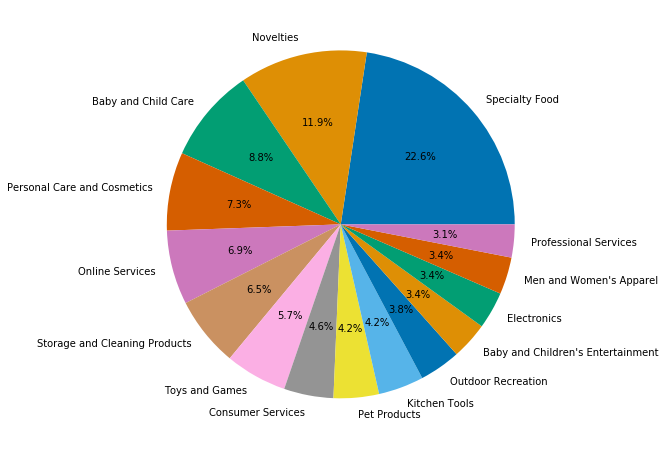

In [15]:
with sns.color_palette('colorblind'):
    plt.figure(figsize=(15,8))
    plt.pie(x=cat_val,labels=cat_key,autopct='%1.1f%%',)
    plt.show()

In [16]:
df.columns

Index(['Unnamed: 0', 'description', 'category', 'entrepreneurs', 'location',
       'website', 'website_length', 'shark1', 'shark2', 'shark3', 'shark4',
       'shark5', 'sharks', 'shark_group', 'title', 'episode-season', 'deal',
       'episode', 'askedFor', 'exchangeForStake', 'valuation', 'season',
       'Multiple_Entreprenuers'],
      dtype='object')

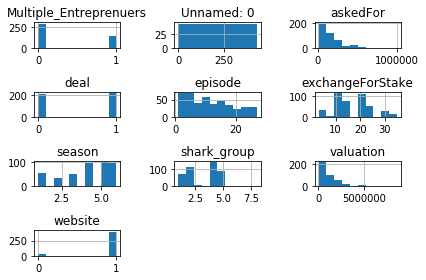

In [20]:
df.hist()
plt.tight_layout()
plt.show()

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
for col in ['askedFor','exchangeForStake','valuation']:
    df[f'{col}_bin']=pd.cut(df[col],bins=3,labels=[0,1,2])

In [24]:
df.head()

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,1000000,15,6666667,1,0,2,1,2
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,460000,10,4600000,1,0,1,0,1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,50000,15,333333,1,0,0,1,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,250000,25,1000000,1,0,0,2,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,2,500000,15,3333333,1,0,1,1,1
